<a href="https://colab.research.google.com/github/Summertree-8/machine_learning/blob/main/ML_Supervised_learning_recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd #organize deta 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset = load_boston()

In [4]:
x, t = dataset.data, dataset.target
columns = dataset.feature_names

In [5]:
type(x), x.shape

(numpy.ndarray, (506, 13))

In [6]:
type(t), t.shape

(numpy.ndarray, (506,))

In [7]:
df = pd.DataFrame(x, columns = columns)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df['Target'] = t
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df['Target']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Target, Length: 506, dtype: float64

In [10]:
t = df['Target'].values #target

In [11]:
x = df.drop(labels = ['Target'], axis = 1).values #input datas

In [12]:
#学習用　#テスト用

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, t_train, t_test = train_test_split(x,t,test_size = 0.3, random_state = 0) #30% for test / random but keep same inorder to get same result on test

In [15]:
len(x_train) #506 0.7

354

In [16]:
len(x_test)

152

In [17]:
#model 

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#モデルの学習

In [22]:
model.fit(x_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#モデルの検証 パラメータ　バイアス

In [26]:
model.coef_ #重み　13個　(入力変数をかける)

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

<BarContainer object of 13 artists>

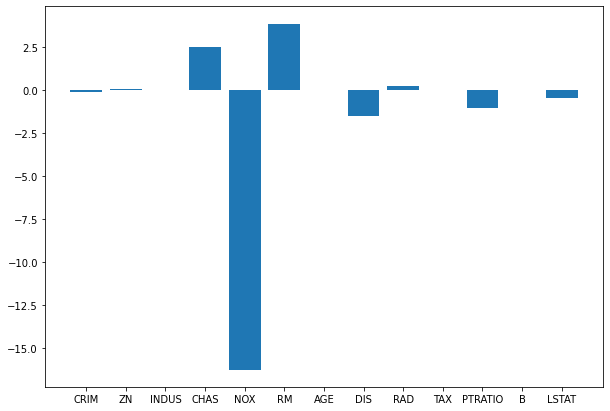

In [29]:
plt.figure(figsize=(10,7)) #10:7の比率で表示
plt.bar(x=columns, height=model.coef_)

In [30]:
model.intercept_

37.93710774183309

In [ ]:
#精度の確認検証　1に近づくほど良い

In [31]:
print(f'train score: {model.score(x_train, t_train)}')
print(f'test score: {model.score(x_test, t_test)}')

train score: 0.7645451026942549
test score: 0.6733825506400171


In [32]:
#testでもちゃんと学習できているかが重要(教師あり)
#過学習：学習用データにフィットしすぎ
#推論：新しいデータに対して予測

In [37]:
y = model.predict(x_test)

In [36]:
x_test.shape

(152, 13)

In [38]:
y

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [39]:
print(f'予測値: {y[0]}')
print(f'目標値: {t_test[0]}')

予測値: 24.935707898576915
目標値: 22.6


In [ ]:
#差がある

In [40]:
print(f'予測値: {y[1]}')
print(f'目標値: {t_test[1]}')

予測値: 23.751631640748066
目標値: 50.0


In [ ]:
#差がある、予測はずれている、過学習が起こっている

In [ ]:
#過学習を防ぐ方法（サンプル数増やす、パイパーパラメータ、他のアルゴリズム使う)

In [ ]:
#多重共線性